In [1]:
%matplotlib inline
from KMeans import *
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

moved 23 rows
moved 4 rows
moved 0 rows
now assigning clusters their labels
metrics are (precision, recall, f1)
Safe: 0.9300699300699301, 0.3877551020408163, 0.5473251028806584
Compliant: 0.16853932584269662, 0.6818181818181818, 0.27027027027027023
NonCompliant: 0.05063291139240506, 0.3076923076923077, 0.08695652173913043


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


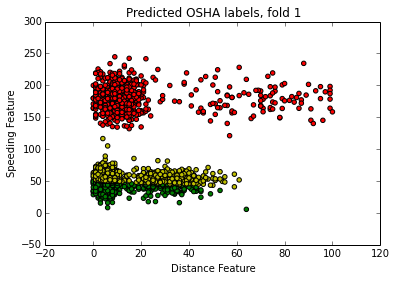

moved 89 rows
moved 53 rows
moved 41 rows
moved 44 rows
moved 31 rows
moved 23 rows
moved 17 rows
moved 16 rows
moved 15 rows
moved 16 rows
moved 12 rows
now assigning clusters their labels
metrics are (precision, recall, f1)
Safe: 0.9197530864197531, 0.43567251461988304, 0.5912698412698413
Compliant: 0.15204678362573099, 0.65, 0.24644549763033174
NonCompliant: 0.11940298507462686, 0.4444444444444444, 0.18823529411764706


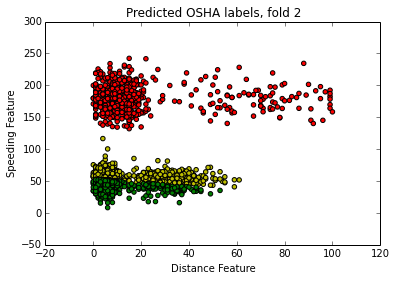

moved 88 rows
moved 48 rows
moved 52 rows
moved 46 rows
moved 34 rows
moved 28 rows
moved 25 rows
moved 20 rows
moved 21 rows
moved 20 rows
moved 22 rows
now assigning clusters their labels
metrics are (precision, recall, f1)
Safe: 0.9354838709677419, 0.42151162790697677, 0.5811623246492986
Compliant: 0.12244897959183673, 0.47368421052631576, 0.19459459459459458
NonCompliant: 0.07142857142857142, 0.3888888888888889, 0.12068965517241378


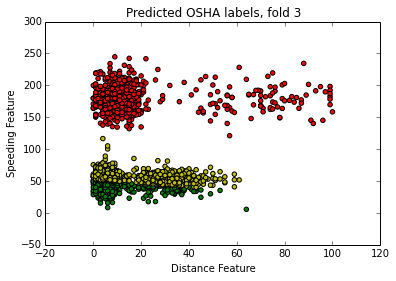

moved 75 rows
moved 40 rows
moved 30 rows
moved 30 rows
moved 26 rows
moved 26 rows
moved 26 rows
moved 19 rows
moved 15 rows
moved 19 rows
moved 11 rows
now assigning clusters their labels
metrics are (precision, recall, f1)
Safe: 0.9476744186046512, 0.4553072625698324, 0.6150943396226415
Compliant: 0.10457516339869281, 0.5714285714285714, 0.17679558011049723
NonCompliant: 0.08, 0.42857142857142855, 0.1348314606741573


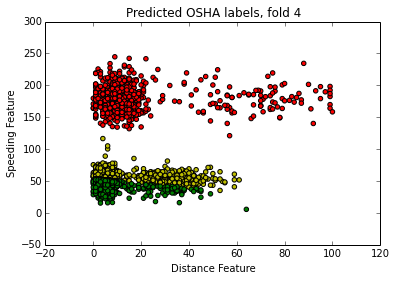

moved 62 rows
moved 34 rows
moved 25 rows
moved 26 rows
moved 22 rows
moved 20 rows
moved 14 rows
moved 18 rows
moved 12 rows
moved 8 rows
moved 8 rows
now assigning clusters their labels
metrics are (precision, recall, f1)
Safe: 0.935064935064935, 0.41379310344827586, 0.5737051792828685
Compliant: 0.12727272727272726, 0.5833333333333334, 0.20895522388059698
NonCompliant: 0.06172839506172839, 0.3125, 0.10309278350515463


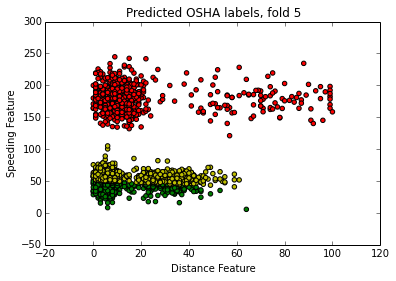

moved 92 rows
moved 59 rows
moved 47 rows
moved 43 rows
moved 43 rows
moved 32 rows
moved 29 rows
moved 23 rows
moved 23 rows
moved 22 rows
moved 19 rows
now assigning clusters their labels
metrics are (precision, recall, f1)
Safe: 0.926829268292683, 0.43804034582132567, 0.5949119373776909
Compliant: 0.1568627450980392, 0.6153846153846154, 0.25
NonCompliant: 0.07228915662650602, 0.42857142857142855, 0.12371134020618557


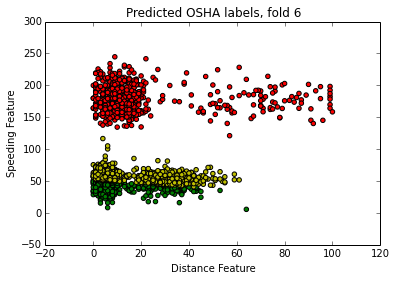

moved 31 rows
moved 19 rows
moved 6 rows
moved 6 rows
moved 4 rows
moved 3 rows
moved 3 rows
moved 1 rows
moved 1 rows
moved 1 rows
moved 1 rows
now assigning clusters their labels
metrics are (precision, recall, f1)
Safe: 0.8580645161290322, 0.3993993993993994, 0.5450819672131147
Compliant: 0.15723270440251572, 0.46296296296296297, 0.23474178403755866
NonCompliant: 0.05813953488372093, 0.38461538461538464, 0.10101010101010101


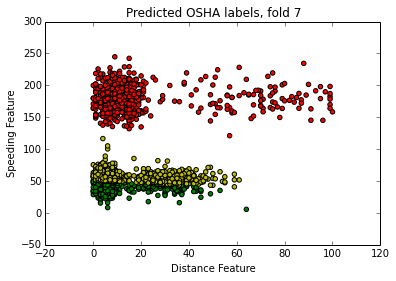

moved 65 rows
moved 31 rows
moved 28 rows
moved 31 rows
moved 28 rows
moved 26 rows
moved 19 rows
moved 15 rows
moved 10 rows
moved 11 rows
moved 7 rows
now assigning clusters their labels
metrics are (precision, recall, f1)
Safe: 0.9074074074074074, 0.4310850439882698, 0.584493041749503
Compliant: 0.15568862275449102, 0.5531914893617021, 0.24299065420560748
NonCompliant: 0.04225352112676056, 0.25, 0.07228915662650602


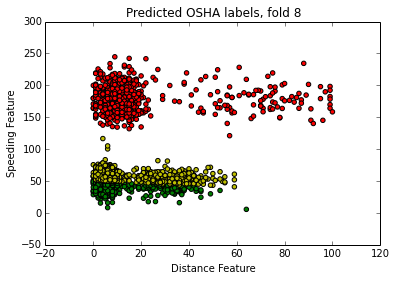

moved 34 rows
moved 24 rows
moved 18 rows
moved 17 rows
moved 6 rows
moved 5 rows
moved 5 rows
moved 2 rows
moved 0 rows
now assigning clusters their labels
metrics are (precision, recall, f1)
Safe: 0.9415584415584416, 0.4190751445086705, 0.58
Compliant: 0.12571428571428572, 0.6285714285714286, 0.20952380952380953
NonCompliant: 0.11267605633802817, 0.42105263157894735, 0.17777777777777778


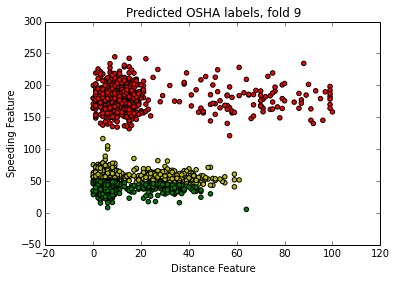

moved 75 rows
moved 58 rows
moved 53 rows
moved 38 rows
moved 33 rows
moved 35 rows
moved 36 rows
moved 28 rows
moved 21 rows
moved 18 rows
moved 20 rows
now assigning clusters their labels
metrics are (precision, recall, f1)
Safe: 0.9333333333333333, 0.41916167664670656, 0.5785123966942148
Compliant: 0.19753086419753085, 0.6956521739130435, 0.3076923076923077
NonCompliant: 0.13636363636363635, 0.6, 0.22222222222222218


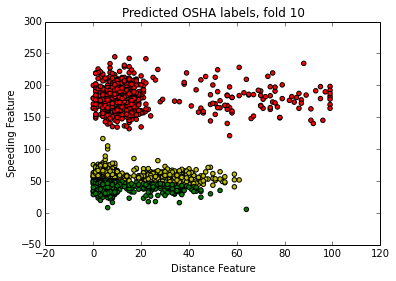

In [2]:
dt = np.dtype([('HeatMiser_ID', np.unicode_, 16), ('Distance_Feature', np.float), ('Speeding_Feature', np.int_), ('Location', np.unicode_, 16), ('OSHA', np.unicode_, 16)])
data = np.loadtxt('HW3_Data.txt', dtype=dt, delimiter='\t', skiprows=1)
# shuffle the data before performing 10-fold cross validation once
np.random.shuffle(data)
testStart = 0
# testSize = 3500
testSize = 400

# perform 10 fold cross validation
for i in range(10):
    testSet = data[testStart:testStart+testSize]
    trainSet = data[0:testStart]
    trainSet= np.concatenate((trainSet, data[testStart+testSize:]))
    
    c = KMC(3, 'HeatMiser_ID', ['Distance_Feature', 'Speeding_Feature'], trainSet, 'OSHA')
    c.fit(['Compliant', 'NonCompliant', 'Safe'])
    c.test(testSet)
    
    testStart += testSize
    
    for cluster in c.clusters:
        clusterRows = cluster.getRowsAsNumpy()
        speeds = [x['Speeding_Feature'] for x in clusterRows]
        distances = [x['Distance_Feature'] for x in clusterRows]
        if cluster.label == 'Safe':
            color = 'g'
        elif cluster.label == 'Compliant':
            color = 'y'
        elif cluster.label == 'NonCompliant':
            color = 'r'
        plt.scatter(speeds, distances, c=color)

    plt.title('Predicted OSHA labels, fold {}'.format(i + 1))
    plt.xlabel('Distance Feature') 
    plt.ylabel('Speeding Feature')
    plt.show()

# TODO: Print visualization with every fold

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


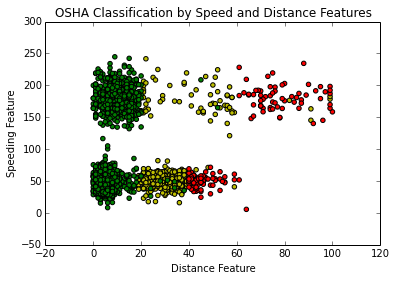

In [7]:
'''plotting the distribution of Compliant, NonCompliant, and Safe data points across the features that
    we arere using to train KMeans '''
dt = np.dtype([('HeatMiser_ID', np.unicode_, 16), ('Distance_Feature', np.float), ('Speeding_Feature', np.int_), ('Location', np.unicode_, 16), ('OSHA', np.unicode_, 16)])
data = np.loadtxt('HW3_Data.txt', dtype=dt, delimiter='\t', skiprows=1)
trainSet = data
compliant = [c for c in trainSet if c['OSHA'] == 'Compliant']
noncompliant = [c for c in trainSet if c['OSHA'] == 'NonCompliant']
safe = [c for c in trainSet if c['OSHA'] == 'Safe']

labels = [compliant, noncompliant, safe]

colors = ['y' , 'r', 'g']
labelsNames = ['Compliant', 'NonCompliant', 'Safe']
i = 0
for cluster in labels:
    speeds = [x['Speeding_Feature'] for x in cluster]
    distances = [x['Distance_Feature'] for x in cluster]
    plt.scatter(speeds, distances, c=colors[i], label=labelsNames[i])
    i += 1

# plt.scatter(trainSetSpeeds, trainSetDistances)
# plt.legend()
plt.title('OSHA Classification by Speed and Distance Features')
plt.xlabel('Distance Feature') 
plt.ylabel('Speeding Feature')
plt.show()